# Data Processing
### Convert medium data set to SKELETON features

In [3]:
import cv2
import os
import os.path as osp
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd

from datetime import datetime

from skimage.morphology import skeletonize_3d
from skimage.morphology import skeletonize
from skimage.morphology import thin
from skimage import data
from skimage.util import invert
from skimage.color import rgb2gray
from skimage.feature import hog
from skimage.transform import resize

In [4]:
def one_to_skeleton(frame):
    
    (thresh, frame) = cv2.threshold(frame, 100, 255, cv2.THRESH_BINARY)
    skeleton = skeletonize(frame/255.0).astype(float)

    return skeleton


def to_skeleton(frames):
    return [one_to_skeleton(f) for f in frames]

In [5]:
def to_df_skeleton_only(
    df,
    save_path
):
    df = df.copy()
    
    i = 0
    prev_progress = 0
    size = len(df)
    
    res = []
    for index, row in df.iterrows():
        
        skl = one_to_skeleton(row["image"])
        res.append(skl)

        i += 1
        cur_progress = int((i+1)*100/size)
        if cur_progress >= prev_progress + 2:
            print(f"progress: {cur_progress}%")
            print(f"processing {index} at {datetime.now()}")
            prev_progress = cur_progress
            
    df["image"] = res
    df.to_pickle(save_path)

    return df

In [6]:
from nebula.common import write_pickle, read_pickle, display

In [7]:
image_pickle_path = 'C:/Users/aphri/Documents/t0002/pycharm/data/yg_ar/image_medium_df.pkl'
skl_pickle_path = 'C:/Users/aphri/Documents/t0002/pycharm/data/yg_ar/image_medium_df_skeleton.pkl'

In [8]:
df = read_pickle(image_pickle_path)

In [9]:
skl = one_to_skeleton(df["image"].iloc[0])

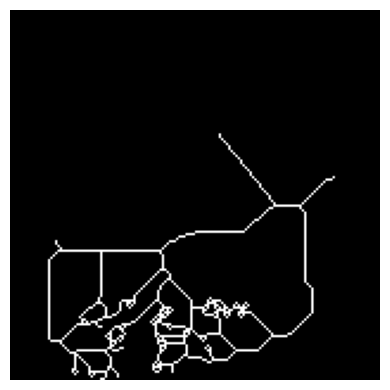

In [10]:
display(skl)

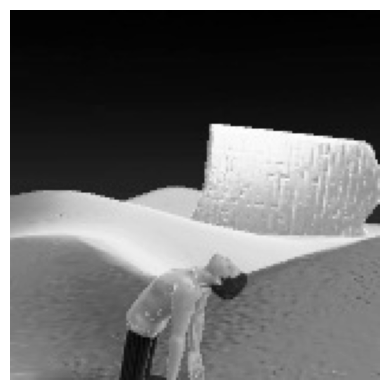

In [11]:
display(df["image"].iloc[0])

In [12]:
to_df_skeleton_only(df, skl_pickle_path)

progress: 2%
processing 398 at 2023-04-17 19:08:22.946224
progress: 4%
processing 798 at 2023-04-17 19:08:24.033734
progress: 6%
processing 1198 at 2023-04-17 19:08:25.180760
progress: 8%
processing 1598 at 2023-04-17 19:08:26.330128
progress: 10%
processing 1998 at 2023-04-17 19:08:27.461009
progress: 12%
processing 2398 at 2023-04-17 19:08:28.630928
progress: 14%
processing 2798 at 2023-04-17 19:08:29.802614
progress: 16%
processing 3198 at 2023-04-17 19:08:31.075150
progress: 18%
processing 3598 at 2023-04-17 19:08:32.225855
progress: 20%
processing 3998 at 2023-04-17 19:08:33.396226
progress: 22%
processing 4398 at 2023-04-17 19:08:34.547795
progress: 24%
processing 4798 at 2023-04-17 19:08:35.764170
progress: 26%
processing 5198 at 2023-04-17 19:08:36.996850
progress: 28%
processing 5598 at 2023-04-17 19:08:38.058298
progress: 30%
processing 5998 at 2023-04-17 19:08:39.070094
progress: 32%
processing 6398 at 2023-04-17 19:08:40.238978
progress: 34%
processing 6798 at 2023-04-17 19

,image,label_a,label_at,file_name
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",camel,camel_1,camel_1_hair_0_cloth_0_pants_2_Z1005_XOP5_YOP1...
1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",camel,camel_1,camel_1_hair_0_cloth_0_pants_2_Z1013_XON12_YON...
2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",camel,camel_1,camel_1_hair_0_cloth_0_pants_2_Z1014_XON4_YON8...
3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",camel,camel_1,camel_1_hair_0_cloth_0_pants_2_Z1016_XON15_YON...
4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",camel,camel_1,camel_1_hair_0_cloth_0_pants_2_Z1040_XON13_YON...
...,...,...,...,...
19995,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",warrior_II,warrior_II_4,warrior_II_4_hair_3_cloth_3_pants_1_Z897_XOP9_...
19996,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",warrior_II,warrior_II_4,warrior_II_4_hair_3_cloth_3_pants_1_Z930_XOP2_...
19997,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",warrior_II,warrior_II_4,warrior_II_4_hair_3_cloth_3_pants_1_Z973_XON9_...
19998,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",warrior_II,warrior_II_4,warrior_II_4_hair_3_cloth_3_pants_1_Z977_XOP15...


In [13]:
skl_df = pd.read_pickle(skl_pickle_path)

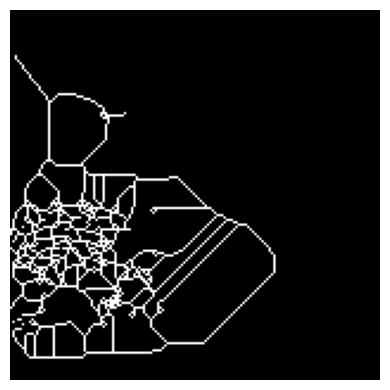

In [14]:
display(skl_df["image"].iloc[2801])